In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Case Study 1 : Finding the winning strategy in a card game 


### Problem statement
Bạn có muốn kiếm được 1 ít tiền không ? Hãy đặt cược và 1 trò chơi bài với số tiền cực nhỏ.Trước mặt bạn là một bộ bài bị xáo trộn. Tất cả 52 lá nằm úp xuống. Một nửa số thẻ có màu đỏ, và một nửa là màu đen. Tôi sẽ tiến hành lật từng thẻ một. Nếu lá bài cuối cùng tôi lật có màu đỏ, bạn sẽ thắng một đô la. Nếu không, bạn sẽ mất một đô la.

Đây là bước ngoặt: bạn có thể yêu cầu tôi tạm dừng trò chơi bất cứ lúc nào. Khi bạn nói “Tạm dừng”, tôi sẽ lật lá bài tiếp theo và kết thúc trò chơi. Thẻ tiếp theo sẽ đóng vai trò là thẻ cuối cùng. Bạn sẽ giành được một đô la nếu nó có màu đỏ,

#### Overview 
1. Tính xác xuất và quan sát sự kiện 
2. Vẽ đồ thị xác xuất của sự kiện trên 1 khoảng thời gian 
3. Simulate random processes, such as coin flips and card shuffling, using Python.

# Computing probabilities using Python 
Trong chương này chúng ta sẽ học được 
1. Những cái gì là cơ bản về lý thuyết xác xuất
2. Tính xuất xuất của 1 quan sát
3. Tính toán xác xuất theo phạm vị quan sát 

## 1.1 Sample space analysis
Một hành động có thể đo lường. Một *không gian mẫu* là tập hợp của tất cả các trường hợp có thể xẩy ra của hành động đó . Chúng ta cùng lấy 1 hành động đơi giản của đồng xu. Chỉ đơn giảng là Mặt ngửa hay mặt ups. và chúng ta lưu trữ cái không gian mẫu

In [2]:
sample_space = {'Head','Tails'}

Tính toán xác xuất khi tung mặt ngửa


In [3]:
probability_heads = 1/len(sample_space)
print(f"Probability of choosing head is {probability_heads}")

Probability of choosing head is 0.5


**Sự kiện** là 1 tập con của các phần tử trong không gian mẫu phù hợp với 1 vài sự kiện có điều kiên. Một sự kiện điều kiện là đơn giản là Boolean function cái nơi đầu vào là 1 các phần tử là không gian mẫu. Hàm đó trả về `True` khi và chỉ khi element phù hợp với điều kiện của chúng ta

Chúng ta cùng định nghĩa các sự kiện có điều kiệu 

In [4]:
def is_head_or_tails(outcome):
    return outcome in {'Head','Tails'}
def is_neither(outcome):
    return not is_head_or_tails(outcome)
def is_heads(outcome):
    return outcome == 'Head'
def is_tails(outcome):
    return outcome == 'Tails'

Chúng ta có thể truyền `event condition` vào trong 1 hàm có tên là `get_matching_even` function rằng function định nghĩa ở dưới đây


In [5]:
def get_matching_event(event_condition,sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

In [6]:
event_conditions = [is_head_or_tails,is_heads,is_tails,is_neither]
for event_condition in event_conditions:
    print(f"Event condition : {event_condition.__name__}")
    event = get_matching_event(event_condition,sample_space)
    print(f"Event: {event}")


Event condition : is_head_or_tails
Event: {'Head', 'Tails'}
Event condition : is_heads
Event: {'Head'}
Event condition : is_tails
Event: {'Tails'}
Event condition : is_neither
Event: set()


In [7]:
def compute_probability(event_condition,generic_sample_space):
    event = get_matching_event(event_condition,generic_sample_space)
    return len(event)/len(generic_sample_space)
    

In [8]:
for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_head_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


### 1.1.1 Analyzing a biased coin
Chúng ta đã tính toán xác xuất của 1 unbiased coin. Cái gì xảy ra nếu coin có thêm biased. Giả sử rằng, coin mặt ngửa khả năng rơi vào mặt ngửa là gấp 4 lần thằng mặt sấp. Làm ntn để chúng ta tính đoán cái `outcome`

In [9]:
weighted_sample_space = {'Heads':4,'Tails':1}

Chúng ta đã có 1 không gian mẫu mới và được lưu trữ trong 1 dic. Đây sẽ cho phép chúng ta định nghĩa lại cái size của không gian mẫu là `sum weight`.

In [10]:
sample_space_size = sum(weighted_sample_space.values())
print(sample_space_size)

5


In [11]:
assert sample_space_size == 5

Chúng ta đã định nghĩa lại cái kích thước của sự kiện. Mỗi sự kiệu là tập của outcomes và cái đó phải map với weiths. 

In [12]:
event = get_matching_event(is_head_or_tails,weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert  event_size == 5

AssertionError: 

In [13]:
def compute_event_probability(event_condition,generic_sample_space):
    event = get_matching_event(event_condition,generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event)/len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size/sum(generic_sample_space.values())

In [14]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_head_or_tails' is 0.2
Probability of event arising from 'is_heads' is 0.0
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.8


##  Computing nontrivial probabilities 
Chúng ta sẽ giải quyết một số vấn đề ví dụ bằng cách sử dụng *compute_event_probability*

### 1.2.1 Problem 1: Phân tính 1 gia đình với 4 người con 
Giả sử 1 gia đình có 4 người con. Xác xuất 2 người con là nam ?. Chúng ta sẽ giả sử rằng mỗi con đc sinh ra là nam hoặc nữ. Vì vậy chúng ta có thể xây dựng 1 không gian mẫu không có trọng lượng cái nơi mà mỗi outcome đại diện cho 1 sequences có thể xảy ra của 4 người con được show ở dưới 

BBBB
BBBG 
BBGB
BGBB
GBBB
GGBB
GBBG
GBBG
BBGG
BGBG
GBGB
BGGB
BGGG
GGGB
GBGG
GGBG
GGGG

In [15]:
possible_children= ['Boy','Girl']
sample_space = set()
for child_1 in possible_children:
    for child_2 in possible_children:
        for child_3 in possible_children:
            for child_4 in possible_children:
                outcome = (child_1,child_2,child_3,child_4)
                sample_space.add(outcome)
sample_space

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

Chúng ta đã chạy 4 for nested lốp và khám phá ra 1 trật tự của 4 trường hợp. Nhưng ở trên kp là code tối ưu nhất để sử dụng. Chúng ta có thể dễ dàng tạo ra không gian mẫu sử dụng *Python*`itertools.product` function nó sẽ trả về cặt combinartions của tất cả các phần tử trong tất cả input list.

In [16]:
from itertools import  product
all_combinations = product(*(4*[possible_children]))
set(all_combinations)

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

Chúng ta có thể sử dụng tốt hơn bởi sử dụng code
```
set(product(possible_children,repeat=4))
```

In [17]:
sample_space_efficient = set(product(possible_children, repeat=4))

Tính xác suất của trường hợp 2 boys


In [18]:
def has_two_boys(outcome):
    return len([child for child in outcome if child == 'Boy']) == 2

In [19]:
prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}")
#Probability of 2 boys is 0.37

Probability of 2 boys is 0.375


### 1.2.2: Problem 2: Phân tích nhiều con xúc xắc

Giả sử chúng ta 1 cái xúc xắc và các mặt đánh số từ 1 tới 6. và tung nó lên 6 lần. vậy xác xuất mỗi lầ là là 21 ? 

In [20]:
possible_rolls = list(range(1,7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


Tiếp đến chúng ta tạo 1 không gian mẫu cho 6 lần tung xúc xắc sử dụng `product function`

In [21]:
sample_space = set(product(possible_rolls,repeat=6))
sample_space

{(3, 1, 4, 6, 4, 3),
 (6, 1, 3, 6, 3, 3),
 (2, 4, 2, 6, 4, 3),
 (2, 6, 4, 6, 3, 6),
 (3, 1, 1, 2, 2, 3),
 (2, 2, 5, 5, 5, 5),
 (1, 3, 6, 3, 6, 5),
 (6, 2, 3, 3, 2, 6),
 (6, 1, 4, 1, 2, 5),
 (2, 5, 2, 3, 3, 6),
 (6, 2, 3, 2, 3, 2),
 (2, 3, 3, 6, 3, 1),
 (1, 3, 6, 1, 3, 6),
 (1, 6, 1, 6, 4, 4),
 (4, 4, 4, 5, 5, 1),
 (3, 4, 2, 1, 6, 6),
 (3, 1, 6, 5, 2, 6),
 (3, 1, 6, 4, 3, 2),
 (3, 5, 3, 3, 2, 3),
 (3, 6, 5, 3, 3, 4),
 (6, 4, 4, 5, 5, 2),
 (4, 5, 6, 1, 6, 4),
 (5, 1, 3, 6, 4, 2),
 (3, 6, 3, 5, 5, 6),
 (3, 4, 2, 6, 6, 1),
 (6, 3, 5, 3, 1, 1),
 (1, 2, 6, 2, 2, 2),
 (1, 4, 2, 6, 5, 3),
 (6, 5, 4, 1, 5, 1),
 (2, 3, 5, 1, 3, 3),
 (1, 1, 1, 1, 6, 3),
 (1, 2, 2, 4, 1, 4),
 (3, 6, 4, 5, 6, 6),
 (6, 5, 3, 1, 5, 3),
 (4, 2, 5, 2, 1, 2),
 (1, 5, 3, 2, 6, 5),
 (2, 4, 1, 5, 3, 6),
 (2, 1, 2, 3, 5, 5),
 (3, 2, 4, 4, 5, 4),
 (2, 6, 1, 1, 6, 3),
 (5, 4, 5, 5, 6, 2),
 (2, 3, 4, 3, 6, 5),
 (6, 6, 6, 2, 2, 3),
 (3, 5, 4, 5, 1, 1),
 (4, 2, 4, 4, 4, 4),
 (4, 4, 5, 2, 3, 6),
 (5, 6, 5, 1, 3, 6),
 (5, 1, 2, 5,

In [22]:
def has_sum_of_21(outcome):return sum(outcome) == 21

In [23]:
prob = compute_event_probability(has_sum_of_21,sample_space)
prob

0.09284979423868313

### 1.2.3 Problem 3: Tính xác xuất của súc sắc có weighted trong không gian mẫu 

Chúng ta vừa tính xác xuất 6 lần tung xăc có thể tổng là 21. Bây giờ chúng ta sẽ tính lại xác xuất khi có weight trong sample sace. Chúng ta cần  chuyển đổi không gian mẫu không có weighted sang không gian mẫu có weithg. 

In [24]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] +=1

In [25]:
weighted_sample_space

defaultdict(int,
            {21: 4332,
             22: 4221,
             27: 1666,
             12: 456,
             24: 3431,
             19: 3906,
             18: 3431,
             20: 4221,
             23: 3906,
             26: 2247,
             28: 1161,
             15: 1666,
             17: 2856,
             13: 756,
             14: 1161,
             30: 456,
             16: 2247,
             25: 2856,
             9: 56,
             32: 126,
             31: 252,
             29: 756,
             11: 252,
             33: 56,
             10: 126,
             7: 6,
             35: 6,
             8: 21,
             34: 21,
             6: 1,
             36: 1})

In [26]:
num_combinations = weighted_sample_space[21]

In [27]:
num_combinations

4332

In [28]:
event = get_matching_event(lambda x : sum(x) == 21, sample_space)
len(event)

4332

In [29]:
prob = compute_event_probability(lambda x: x == 21,
weighted_sample_space)
prob

0.09284979423868313

## 1.3 Tính xác xuất trên phạm vi khoảng thời gian 
Cho đến nay, chúng tôi chỉ phân tích các điều kiện sự kiện thỏa mãn một số giá trị đơn lẻ. Bây giờ, chúng tôi sẽ phân tích các điều kiện sự kiện kéo dài các khoảng giá trị. Một khoảng thời gian alf 1 tập hợp các só giữa bao gồm 2 ranh giới của chúng. 


In [30]:
def is_in_interval(number,minimum,maximum):
    return minimum <= number <= maximum

Cho bạn một `is_in_interval()`, chúng ta có thể tính xác xuất rằng của 1 sự kiện liên quan tới giá trị trong 1 khoảng số nhất định. Ví dụ, chúng ta sẽ tính  khả năng xả ra của 6 con xúc xắc đó khoảng 10->21 

In [31]:
prob = compute_event_probability(lambda x  : is_in_interval(x,10,21),weighted_sample_space)
print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078


### 1.3.1 : Đánh giá các cực trị bằng cách sử dụng phân tích khoảng thời gian

Phân tích khoảng thời gian là rất quan trọng để giải quyết toàn bộ các vấn đề rất quan trọng trong xác suất và thống kê. Một trong những vấn đề như vậy liên quan đến việc đánh giá các điểm cực đoan: vấn đề nằm ở việc liệu dữ liệu quan sát có quá cực đoan để có thể tin được hay không ? 
Dữ liệu có vẻ cực đoan khi nó xảy ra một cách ngẫu nhiên quá bất thường. Ví dụ: giả sử chúng ta quan sát 10 lần lật của một đồng xu được cho là công bằng và đồng xu đó rơi vào mặt ngửa 8 trong số 10 lần. Đây có phải là một kết quả hợp lý cho một đồng tiền công bằng? Hay đồng xu của chúng ta bí mật thiên về hạ cánh? Để tìm hiểu, chúng ta phải trả lời câu hỏi sau: xác suất để 10 lần tung đồng xu công bằng dẫn đến số đầu cực đoan là bao nhiêu? Chúng tôi sẽ xác định số lượng đầu cực đại là tám đầu trở lên.

In [32]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Head','Tails'], repeat=num_flips):
        head_count = len([outcome for outcome in coin_flips if outcome == 'Head'])
        weighted_sample_space[head_count] +=1
    return weighted_sample_space

In [33]:
weighted_sample_space = generate_coin_sample_space()
weighted_sample_space[10]

1

In [34]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10),
weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


# Section 2- Plotting probabilities using Matplotlib
 

Trong section này chúgn ta cover 
1. Tạo 1 plot đơn giản sử dụng Matplotlib
2. Label plotted data
3. Phân phối xác xuất
4. Ploting và comparing multiple probability distributions 

## 2.1 Basic Matplot lib plots 


Plot a linear relationship

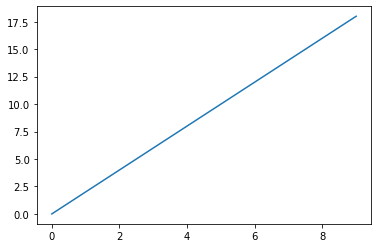

In [35]:
x= range(0,10)
y= [2*value for value in x]
plt.plot(x,y)
plt.show();


Plotting individual data points


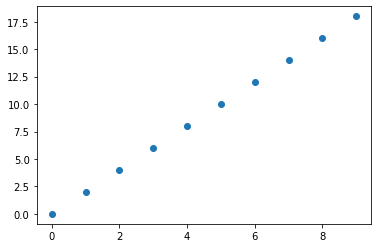

In [36]:
plt.scatter(x,y)
plt.show()

Giả sử chúng ta muốn nhấn mạnh khoảng thời gian mà **x** bắt đầu từ 2 và kết thúc từ 6. Chúng ta có thể làm điều đó bằng việc tô đường cong được vẽ trong khoảng thời gian chỉ định sử dụng. `plt.fill_between()`. Cái hàm này lấu inpuy đầu vào là cả x và y cũng như là where parameter như là 1 lis boolean values và True nếu x value. 

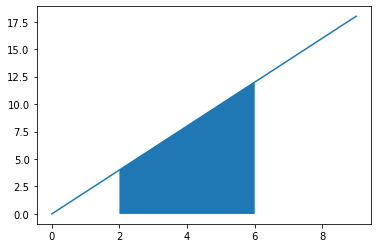

In [37]:
plt.plot(x,y)
where = [is_in_interval(value,2,6) for value in x]
plt.fill_between(x,y,where=where)
plt.show()

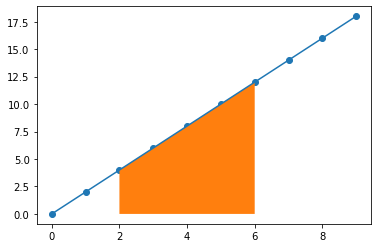

In [38]:
plt.scatter(x,y)
plt.plot(x,y)
where = [is_in_interval(value,2,6) for value in x]
plt.fill_between(x,y,where=where)
plt.show()

### 2.2 Plotting coin-flip probabilities 


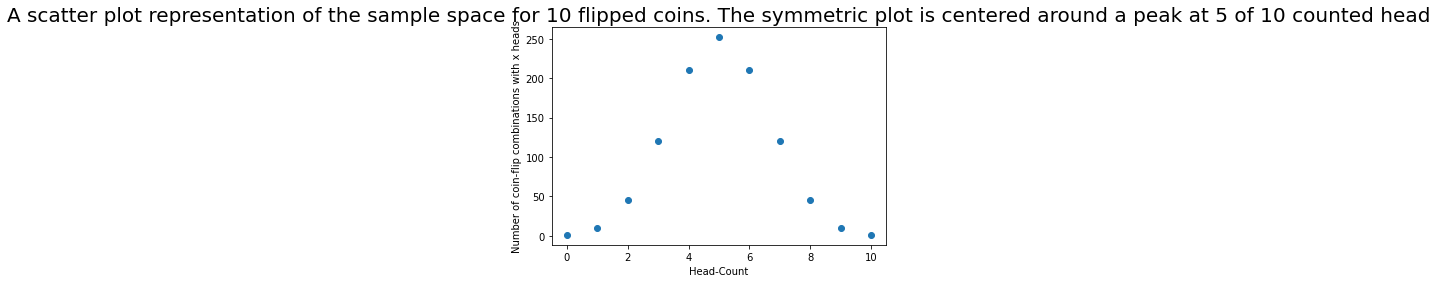

In [39]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips,y_10_flips)
plt.xlabel('Head-Count')
plt.title('A scatter plot representation of the sample space for 10 flipped coins. The symmetric plot is centered around a peak at 5 of 10 counted head',fontsize=20)

plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

Giờ chúng ta  tính xác xuất của số lần tung được 1,2,3,4 mặt ngửa trong 10 lần thử 

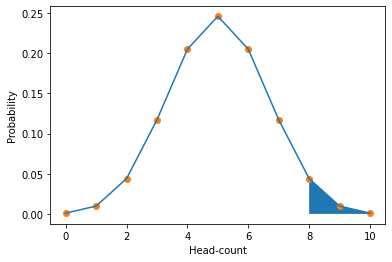

In [40]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips =  [value / sample_space_size for value in y_10_flips]
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips,prob_x_10_flips,where=where)
plt.scatter(x_10_flips,prob_x_10_flips)
plt.plot(x_10_flips,prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

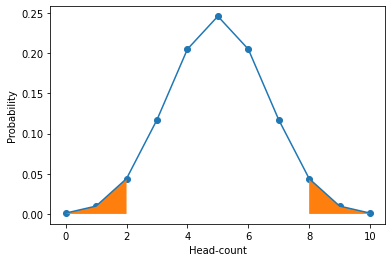

In [41]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

### 2.2.1 Comparing mutiple coin flips probabilities distributions 
 

## 3. Running random simulations in Numpy 


### 3.1 Simulating random coin flips and die rolls using NumPy

In [42]:
die_roll = np.random.randint(1,7)
assert 1 <= die_roll <= 6

In [43]:
np.random.seed(0)
die_rolls = [np.random.randint(1,7) for _ in range(3)]
die_rolls

[5, 6, 1]

In [44]:
np.random.seed(0)
coin_flip = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


Chúng ta giờ mô phỏng 10 lần tung con xúc xắc 


In [45]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)
coin_flips = [np.random.randint(0,2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Head is {freq_heads}")


Frequency of Head is 0.8


Chúng ta đều nhìn thấy điều kỳ lạ tại sao xuất hiện thường xuyên của mặt ngửa là 80% trong khi chúng ta biết nó chỉ là 50%. Thật vậy khi chúng ta tung 1 con xắc đủ lớn thì xác xuất đó mới là xác xuất thật nào chúng ta cùng plot cái đó 

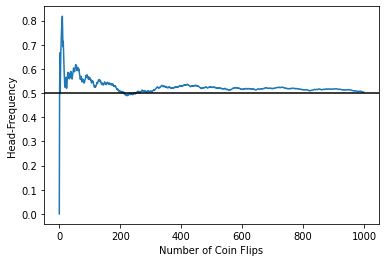

In [46]:
np.random.seed(0)
coin_flips = []
frequencies =[]
for _ in range(1000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(frequency_heads(coin_flips)) ## calculator among cont_flips
plt.plot(list(range(1000)),frequencies)
plt.axhline(0.5,color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

Chúng tôi đã mô phỏng một chuỗi các lần lật đồng xu không thiên vị, nhưng điều gì sẽ xảy ra nếu chúng tôi muốn mô phỏng một đồng xu rơi vào đầu 70% lần. Chà, chúng ta có thể tạo ra kết quả thiên vị đó bằng cách gọi `np.random.binomial(1,0.7)`. **binomial distribution** là phân phối nhị thức 


In [47]:
np.random.seed(0)
print(f"Let's flip the biased coin once")
coin_flip = np.random.binomial(1,0.7)
print(f"Biased coin laned on {'heads' if coin_flip == 1 else 'tails'}.")
print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)

print((f"{head_count} heads were observed out of "
f"{number_coin_flips} biased coin flips"))


Let's flip the biased coin once
Biased coin laned on heads.

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


In [48]:
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")


Frequency of Heads is 0.697


Tuy nhiên, độ không đảm bảo của chúng ta có thể được đo lường và chứa bằng cách sử dụng cái mà các nhà toán học gọi là **confidence interval** khoảng tin cậy

### 3.2 Computing confidence intervals using histograms and NumPy array.(Tính toán khoảng tin cậy sử dụng biểu đồ và NumPy Array )

Giả sử chúng ta được giao một đồng xu thiên vị mà chúng ta không biết. Chúng tôi lật đồng xu 1.000 lần và quan sát tần suất 0,709. Chúng ta biết tần số gần đúng với xác suất thực tế, nhưng bằng bao nhiêu? Chính xác hơn, khả năng xác suất thực tế rơi vào khoảng thời gian gần bằng 0,709 (chẳng hạn như khoảng từ 0,7 đến 0,71) là bao nhiêu? Để tìm hiểu, chúng tôi phải thực hiện lấy mẫu bổ sung.

Trước đây, chúng tôi đã lấy mẫu đồng xu của mình qua 5 lần lặp lại của 1.000 lần lật đồng xu mỗi lần. Việc lấy mẫu tạo ra một số dao động về tần số. Hãy khám phá những biến động này bằng cách tăng số tần suất của chúng tôi từ 5 lên 500. Chúng tôi có thể thực hiện lấy mẫu bổ sung này bằng cách chạy

In [49]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)
head_count_array

array([697, 690, 700, 707, 702, 699, 723, 670, 702, 713, 721, 689, 711,
       697, 717, 691, 731, 697, 722, 728, 695, 697, 688, 696, 679, 687,
       696, 676, 702, 695, 692, 666, 668, 713, 691, 691, 698, 717, 683,
       680, 702, 705, 715, 693, 675, 693, 726, 706, 691, 718, 705, 721,
       697, 716, 699, 708, 680, 686, 703, 692, 694, 684, 679, 707, 722,
       718, 711, 719, 685, 670, 710, 715, 679, 692, 712, 720, 711, 682,
       732, 694, 715, 689, 719, 713, 698, 710, 707, 689, 701, 726, 703,
       679, 721, 697, 699, 698, 711, 719, 724, 731, 695, 679, 703, 697,
       705, 686, 682, 718, 681, 708, 712, 677, 693, 693, 726, 705, 711,
       671, 713, 717, 730, 698, 712, 674, 689, 666, 697, 688, 695, 685,
       720, 671, 688, 689, 696, 716, 706, 699, 727, 698, 692, 706, 702,
       699, 715, 717, 700, 683, 690, 682, 687, 703, 673, 696, 696, 692,
       710, 718, 690, 716, 721, 709, 694, 697, 687, 733, 696, 684, 709,
       713, 726, 695, 705, 709, 723, 685, 693, 675, 712, 704, 69

Một số chú ý về các methods của Numpy Array: 
- `np.random.randint(x,y)`: trả về 1 random integer giữa x và y-1
- `np.random.binomial(1,p)`: trả về 1 giá trị ngẫu nhiên bằng 0 hoặc bằng 1. và xác xuất để giá trị là 1 là p 
- `np.random.binomial(x,p)`: chạy x instances của `np.random.binomial(1,p)` và trả về kết quả tổng hợp. số lượng quan sát khác không trên x mẫu.
- `np.random.binomial(x, p, size=y)`—Returns an array of y elements. Each
array element is equal to a random output of np.random.binomial(x, p).
- `np.random.binomial(x, p, size=y) / x`—Returns an array of y elements.
Each element represents the frequency of nonzero observations across x
samples.

In [50]:
frequency_array = head_count_array/1000
frequency_array[:20]

array([0.697, 0.69 , 0.7  , 0.707, 0.702, 0.699, 0.723, 0.67 , 0.702,
       0.713, 0.721, 0.689, 0.711, 0.697, 0.717, 0.691, 0.731, 0.697,
       0.722, 0.728])

In [51]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


Một vài trong freqecy range là khoảng 0.656 tới 0.733 là giá trị. 

Plotting measured frequencies

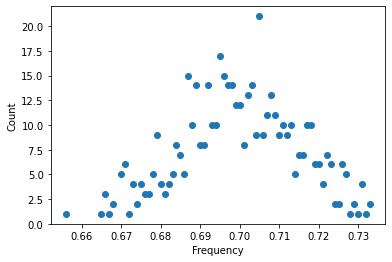

In [52]:
frequency_count = defaultdict(int)
for frequency in frequency_array:
    frequency_count[frequency] +=1
frequencies = list(frequency_count.keys())
counts = [frequency_count[freq] for freq in frequencies]
plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

Hình dung mang tính thông tin: tần số gần 0,7 xảy ra phổ biến hơn các giá trị khác, xa hơn. Tuy nhiên, âm mưu của chúng tôi cũng có sai sót, vì các tần số gần giống nhau xuất hiện dưới dạng các chấm chồng chéo trong biểu đồ. Chúng ta nên nhóm các tần số gần nhau này lại với nhau thay vì coi chúng như các điểm riêng lẻ.

### 3.2.1: Phân loại các điểm tương tự trong các biểu đồ biểu đồ
Thử dùng histogram để xem frequency sự trùng nhau

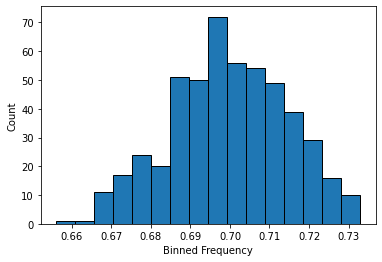

In [53]:
plt.hist(frequency_array,bins='auto',edgecolor='black');
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show();


Đếm số lượng thùng trong 1 hist plot 

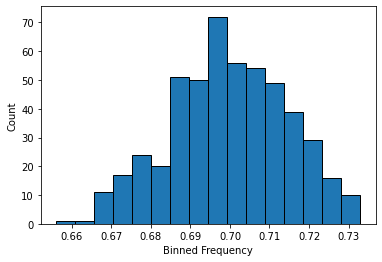

16


array([ 1.,  1., 11., 17., 24., 20., 51., 50., 72., 56., 54., 49., 39.,
       29., 16., 10.])

In [54]:
counts,_,_ = plt.hist(frequency_array,bins='auto',edgecolor='black');
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show();
print(counts.size)
counts

Vậy thì độ rộng của của mỗi bin là bn ?. Chúng ta có thể tìm ra bởi chia cho tổng frequence range bởi 16. Thay vì thế chúng ta sử dụng `bin_edges` array, cái mà biến thứ 2 trả về từ plt.hist

[0.656     0.6608125 0.665625  0.6704375 0.67525   0.6800625 0.684875
 0.6896875 0.6945    0.6993125 0.704125  0.7089375 0.71375   0.7185625
 0.723375  0.7281875 0.733    ]


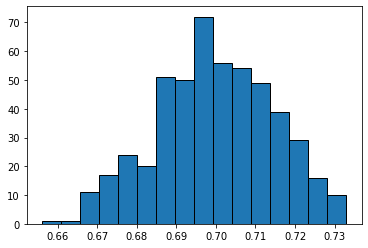

In [55]:
counts,bin_edges,_ = plt.hist(frequency_array,bins='auto',edgecolor='black');
print(bin_edges)
bin_width = bin_edges[1]-bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size

Bin width: 0.004812499999999997


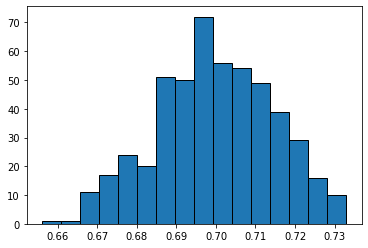

In [56]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto',
edgecolor='black')
bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")


Mảng `bin_edges` có thể được sử dụng song song với các số đếm để xuất ra số phần tử và phạm vi phủ sóng cho bất kỳ bin nào được chỉ định.

In [57]:
def output_bin_coverage(i):
    count = int(counts[i])
    range_start,range_end = bin_edges[i],bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for freqency range {range_string} contains " f"{count} element"))
output_bin_coverage(0)
output_bin_coverage(5)

The bin for freqency range 0.656 - 0.6608125 contains 1 element
The bin for freqency range 0.6800625 - 0.684875 contains 20 element


Sử dụng `argmax()` sẽ trả về histogram's peak 

In [58]:
output_bin_coverage(counts.argmax())

The bin for freqency range 0.6945 - 0.6993125 contains 72 element


Giờ làm sao để tính dược khả năng xảy ra ?. Sớm chúng ta đã tính khả năng xảy ra của một khoảng bằng diện tích của nó dưới một đường cong. Nhưng chỉ khi và chỉ khi cái tổng của ở dưới =1. vâyh nên để làm đc điều đó chúng ta phải thêm parameter `density=True`

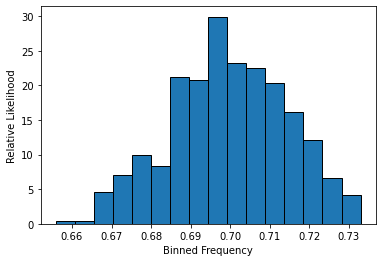

In [59]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto',
edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [60]:
likelihoods

array([ 0.41558442,  0.41558442,  4.57142857,  7.06493506,  9.97402597,
        8.31168831, 21.19480519, 20.77922078, 29.92207792, 23.27272727,
       22.44155844, 20.36363636, 16.20779221, 12.05194805,  6.64935065,
        4.15584416])

In [61]:
assert likelihoods.sum()*bin_width == 1

Computing the probability of the peak frequencies

In [62]:
index = likelihoods.argmax() # take index have values max 
area = likelihoods[index] * bin_width # take area at index (area is probability)
range_start,range_end = bin_edges[index],bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


Compute Increasing the probability of a frequency range

In [63]:
peak_index = likelihoods.argmax()
start_index,end_index = (peak_index-1,peak_index + 2)
area = likelihoods[start_index:end_index+1].sum() * bin_width # compute probilites 
range_start ,range_end = bin_edges[start_index],bin_edges[end_index]
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.464


Ba thùng bao phủ dải tần số khoảng 0,689 đến 0,704. Xác suất liên quan của chúng là 0,464. Do đó, ba thùng đại diện cho cái mà các nhà thống kê gọi là khoảng tin cậy 46,4%, có nghĩa là chúng tôi tin tưởng 46,4% rằng xác suất thực của chúng tôi nằm trong phạm vi ba thùng. Phần trăm tin cậy đó quá thấp. Các nhà thống kê thích khoảng tin cậy từ 95% trở lên. Chúng tôi đạt đến khoảng tin cậy đó bằng cách mở rộng lặp đi lặp lại thùng ngoài cùng bên trái và thùng ngoài cùng bên phải cho đến khi diện tích khoảng này kéo dài qua 0,95

In [72]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index,end_index = peak_index,peak_index+1
    while area < 0.95:
        if start_index > 0: 
            start_index-=1
        if end_index < likelihoods.size - 1:
            end_index+=1
        area = likelihoods[start_index: end_index +1 ].sum() * bin_width
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

In [73]:
compute_high_confidence_interval(likelihoods=likelihoods,bin_width=bin_width)


The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

Dải tần số khoảng 0,670 đến 0,723 thể hiện khoảng tin cậy 95,4%. Do đó, một chuỗi được lấy mẫu gồm 1.000 lần lật đồng xu thiên vị sẽ nằm trong phạm vi đó 95,4% thời gian. Chúng tôi khá tự tin rằng xác suất thực nằm trong khoảng 0,670 đến 0,723. Tuy nhiên, chúng tôi vẫn không thể biết chắc chắn liệu xác suất thực sự là gần 0,67 hay 0,72. Chúng ta cần phải thu hẹp phạm vi đó bằng cách nào đó để có được ước tính xác suất nhiều thông tin hơnn.

### 3.2.3 Shrinking the range of a high confidence interval


In [77]:
np.random.seed(0)
head_count_array = np.random.binomial(1000,0.7,100000)
frequency_array = head_count_array/ 1000
assert frequency_array.size == 100000

In [ ]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
bin_width)
for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


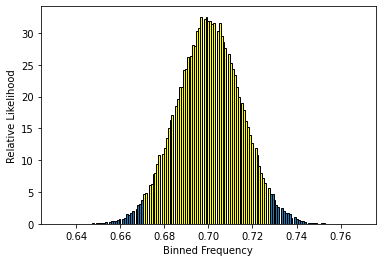

In [78]:
likelihoods,bin_edges,patchs = plt.hist(frequency_array,bins='auto',edgecolor='black',density=True)
bin_width = bin_edges[1]- bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
bin_width)
for i  in range(start_index,end_index):
    patchs[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

Useful methods `histogram`:
- `plt.hist(data, bins=10)`—Plots a histogram in which the elements of data are distributed across 10 equally spaced bins.
- `plt.hist(data, bins='auto')`—Plots a histogram whose bin count is determined automatically, based on the data distribution. auto is the default setting of _bins.
-  `plt.hist(data, edges='black')`—In the plotted histogram, the edges of each bin are marked by black vertical lines.
- `counts, _, _ = plt.hist(data)`—The counts array is the first of the three variables returned by plt.hist. It holds the count of elements contained in each bin. These counts appear on the y-axis of the histogram plot.
-  `_, bin_edges, _ = plt.hist(data)`—The bin_edges array is the second of the three variables returned by plt.hist. It holds the x-axis positions of the vertical bin edges in the plot. Subtracting bin_edges[i] from bin_edges[i + 1] returns the width of every bin. Multiplying the width by counts[i] returns the area of the rectangular bin at position i.
-  `likelihoods, _, _ = plt.hist(data, density=True)`—The binned counts are transformed into likelihoods so that the area beneath the histogram sums to 1.0. Thus, the histogram is transformed into a probability distribution. Multiplying the bin width by likelihoods[i] returns the probability of a random outcome falling within a range of bin_edges[i] - bin_edges[i +1].
- `_, _, patches = plt.hist(data)`—The patches list is the third of the three variables returned by plt.hist. The graphical settings of each bin at index i are stored in patches[i]. Calling patches[i].set_facecolor('yellow') changes the color of the histogram bin at position i.
- `likelihoods, bin_edges = np.histogram(data, density=True)`—Returns the histogram likelihoods and bin edges without actually plotting the results.

### 3.3 Using confidence interval to analyze a biased deck of cards 

In [82]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0,total_cards+1)
red_card_count
black_card_count = total_cards-red_card_count
assert black_card_count != red_card_count

In [83]:
weighted_sample_space = {'red_card': red_card_count,'black_card': black_card_count}
prob_red = compute_event_probability(lambda x : x == 'red_card',weighted_sample_space)

In [84]:
prob_red

0.8461538461538461

In [85]:
assert prob_red == red_card_count / total_cards

## Case Study 1 solution 
Trong chương này chúng ta cover: 
1. Card game simulations 
2. probabilistic strategy optimization 
3. Khoảng tin cậy 

Mục đích của chúng tôi là chơi một trò chơi bài trong đó các quân bài được lật lặp đi lặp lại cho đến khi chúng tôi yêu cầu người chia bài dừng lại. Sau đó, một thẻ bổ sung được lật. Nếu thẻ đó màu đỏ, chúng ta thắng một đô la; nếu không, chúng tôi mất một đô la. Mục tiêu của chúng tôi là khám phá một chiến lược dự đoán tốt nhất một thẻ đỏ trong bộ bài. Chúng tôi sẽ làm như vậy bằng cách: 
1. Phát triển nhiều chiến lược để dự đoán thẻ đỏ trong một bộ bài xáo trộn ngẫu nhiên.
2. Áp dụng từng chiến lược trên nhiều mô phỏng để tính toán xác suất thành công của nó trong khoảng tin cậy cao. Nếu những tính toán này được chứng minh là không thể thực hiện được, thay vào đó, chúng tôi sẽ tập trung vào những chiến lược hoạt động tốt nhất trên không gian mẫu 10 thẻ chú kp 52
3.  Returning the simplest strategy associated with the highest probability of success.


In [88]:
red_cards = [1] * 26
black_cards = [0] * 26
unshuffled_deck = red_cards + black_cards
#unshuffled_deck

In [89]:
np.random.seed(1)
shuffled_deck  = np.random.permutation(unshuffled_deck)
shuffled_deck

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0])

In [90]:
shuffled_deck[:-1]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0])

In [95]:
remain_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
    remain_red_cards-=card
    remain_total_cards = 52-i-1
    if remain_red_cards / remain_total_cards > 0.5:
        break
print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 0.
The next card in the deck is red.
We have won!


Chiến lược này đã mang lại chiến thắng trong lần thử đầu tiên của chúng tôi. Chiến lược của chúng tôi dừng lại khi phần số thẻ đỏ còn lại lớn hơn một nửa tổng số thẻ còn lại. Chúng ta có thể tổng quát phân số đó bằng tham số min_red_fraction, do đó sẽ tạm dừng khi tỷ lệ thẻ đỏ lớn hơn giá trị tham số đã nhập. Chiến lược tổng quát này được thực hiện tiếp theo với giá trị đặt trước `min_red_fraction` là 0,5.

Generalizing the card game strategy


In [98]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
def execution_strategy(min_faction_red=0.5,shuffled_deck= None,return_idx = False):
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)
    remaining_red_cards = total_red_cards
    for i,card in enumerate(shuffled_deck[:-1]):
        remain_red_cards-=card
        fraction_red_cards = remain_total_cards / (total_cards-i-1)
        if fraction_red_cards > min_faction_red:
            break
    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]